# BPE Tokenizer Analysis

This notebook analyzes the vocabulary and merges generated by the BPE tokenizer training process.

In [23]:
import pickle
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Tuple

## Load BPE Results

First, let's load the vocabulary and merges from the pickle files.

In [24]:
def load_bpe_results(output_name: str, output_dir: str = "output"):
    """
    Load vocabulary and merges from pickle files.
    
    Args:
        output_name: Base name of the files (without extension)
        output_dir: Directory containing the pickle files
    
    Returns:
        Tuple of (vocab, merges)
    """
    vocab_path = os.path.join(output_dir, f"{output_name}_vocab.pkl")
    merges_path = os.path.join(output_dir, f"{output_name}_merges.pkl")
    
    with open(vocab_path, "rb") as f:
        vocab = pickle.load(f)
    
    with open(merges_path, "rb") as f:
        merges = pickle.load(f)
    
    return vocab, merges

In [25]:
# List available BPE results
output_dir = "output"
if os.path.exists(output_dir):
    files = os.listdir(output_dir)
    vocab_files = [f for f in files if f.endswith('_vocab.pkl')]
    available_models = [f.replace('_vocab.pkl', '') for f in vocab_files]
    print("Available BPE models:")
    for model in available_models:
        print(f"  - {model}")
else:
    print("No output directory found. Run BPE training first.")
    available_models = []

Available BPE models:
  - tinystories_sample
  - openwebtext_valid
  - tinystories_test
  - tinystories_train


## Analyze a Specific Model

Choose a model to analyze (change the model_name below):

In [ ]:
# Choose which model to analyze
model_name = "openwebtext_valid"  # Change this to analyze different models

if model_name in available_models:
    vocab, merges = load_bpe_results(model_name)
    print(f"Loaded model: {model_name}")
    print(f"Vocabulary size: {len(vocab)}")
    print(f"Number of merges: {len(merges)}")
else:
    print(f"Model '{model_name}' not found. Available models: {available_models}")

Loaded model: tinystories_train
Vocabulary size: 10000
Number of merges: 9743


## Vocabulary Analysis

### 1. Longest Token in Vocabulary

In [15]:
if 'vocab' in locals():
    # Find the longest token
    longest_token = None
    max_length = 0
    
    for token_id, token_bytes in vocab.items():
        if len(token_bytes) > max_length:
            max_length = len(token_bytes)
            longest_token = token_bytes
    
    print(f"Longest token in vocabulary:")
    print(f"  Length: {max_length} bytes")
    print(f"  Bytes: {longest_token}")
    try:
        decoded = longest_token.decode('utf-8', errors='replace')
        print(f"  Decoded: '{decoded}'")
    except:
        print(f"  Cannot decode as UTF-8")
else:
    print("No vocabulary loaded.")

Longest token in vocabulary:
  Length: 15 bytes
  Bytes: b' accomplishment'
  Decoded: ' accomplishment'


### 2. Token Length Distribution

Token length distribution:
  1 bytes: 256 tokens (2.6%)
  2 bytes: 359 tokens (3.6%)
  3 bytes: 907 tokens (9.1%)
  4 bytes: 1450 tokens (14.5%)
  5 bytes: 1836 tokens (18.4%)
  6 bytes: 1667 tokens (16.7%)
  7 bytes: 1268 tokens (12.7%)
  8 bytes: 1030 tokens (10.3%)
  9 bytes: 602 tokens (6.0%)
  10 bytes: 328 tokens (3.3%)
  11 bytes: 178 tokens (1.8%)
  12 bytes: 78 tokens (0.8%)
  13 bytes: 27 tokens (0.3%)
  14 bytes: 11 tokens (0.1%)
  15 bytes: 3 tokens (0.0%)


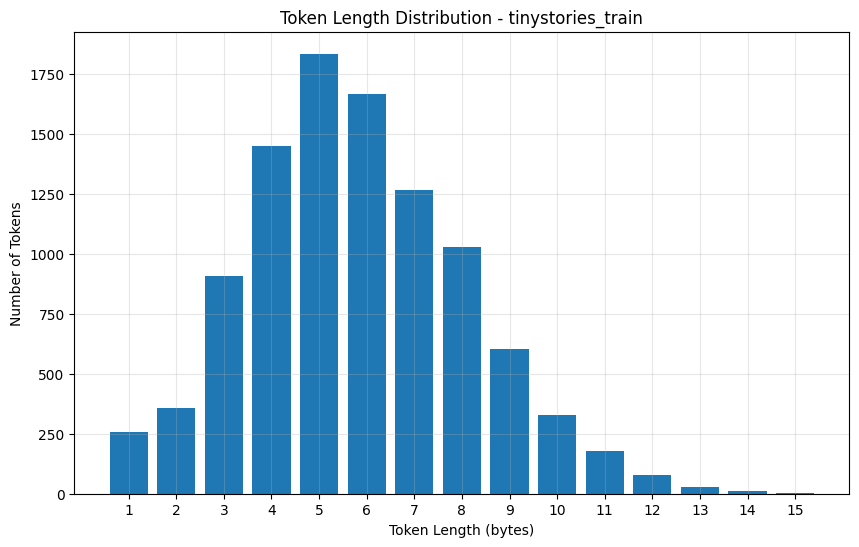

In [16]:
if 'vocab' in locals():
    # Analyze token length distribution
    token_lengths = [len(token_bytes) for token_bytes in vocab.values()]
    length_counter = Counter(token_lengths)
    
    print("Token length distribution:")
    for length in sorted(length_counter.keys()):
        count = length_counter[length]
        print(f"  {length} bytes: {count} tokens ({count/len(vocab)*100:.1f}%)")
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    lengths = sorted(length_counter.keys())
    counts = [length_counter[l] for l in lengths]
    
    plt.bar(lengths, counts)
    plt.xlabel('Token Length (bytes)')
    plt.ylabel('Number of Tokens')
    plt.title(f'Token Length Distribution - {model_name}')
    plt.xticks(lengths)
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No vocabulary loaded.")

### 3. Sample Tokens by Length

In [17]:
if 'vocab' in locals():
    # Show sample tokens for each length
    tokens_by_length = {}
    for token_id, token_bytes in vocab.items():
        length = len(token_bytes)
        if length not in tokens_by_length:
            tokens_by_length[length] = []
        tokens_by_length[length].append(token_bytes)
    
    print("Sample tokens by length:")
    for length in sorted(tokens_by_length.keys()):
        samples = tokens_by_length[length][:5]  # Show first 5
        print(f"\n{length} bytes ({len(tokens_by_length[length])} total):")
        for i, token_bytes in enumerate(samples):
            try:
                decoded = token_bytes.decode('utf-8', errors='replace')
                print(f"  {i+1}. {token_bytes} -> '{decoded}'")
            except:
                print(f"  {i+1}. {token_bytes} -> [cannot decode]")
else:
    print("No vocabulary loaded.")

Sample tokens by length:

1 bytes (256 total):
  1. b'\x00' -> ' '
  2. b'\x01' -> ''
  3. b'\x02' -> ''
  4. b'\x03' -> ''
  5. b'\x04' -> ''

2 bytes (359 total):
  1. b' t' -> ' t'
  2. b'he' -> 'he'
  3. b' a' -> ' a'
  4. b' s' -> ' s'
  5. b' w' -> ' w'

3 bytes (907 total):
  1. b' to' -> ' to'
  2. b' wa' -> ' wa'
  3. b' he' -> ' he'
  4. b' sa' -> ' sa'
  5. b' ha' -> ' ha'

4 bytes (1450 total):
  1. b' the' -> ' the'
  2. b' and' -> ' and'
  3. b' was' -> ' was'
  4. b' The' -> ' The'
  5. b' day' -> ' day'

5 bytes (1836 total):
  1. b' They' -> ' They'
  2. b' said' -> ' said'
  3. b' play' -> ' play'
  4. b' with' -> ' with'
  5. b' happ' -> ' happ'

6 bytes (1667 total):
  1. b' happy' -> ' happy'
  2. b' there' -> ' there'
  3. b' named' -> ' named'
  4. b'gether' -> 'gether'
  5. b' could' -> ' could'

7 bytes (1268 total):
  1. b' friend' -> ' friend'
  2. b' little' -> ' little'
  3. b' wanted' -> ' wanted'
  4. b' played' -> ' played'
  5. b' looked' -> ' looke

### 4. Special Tokens and Base Vocabulary Analysis

In [18]:
if 'vocab' in locals():
    # Identify different types of tokens
    byte_tokens = []  # Single byte tokens (0-255)
    special_tokens = []  # Special tokens like <|endoftext|>
    merged_tokens = []  # Tokens created by merging
    
    for token_id, token_bytes in vocab.items():
        if len(token_bytes) == 1:
            byte_tokens.append((token_id, token_bytes))
        elif token_bytes.startswith(b'<|') and token_bytes.endswith(b'|>'):
            special_tokens.append((token_id, token_bytes))
        else:
            merged_tokens.append((token_id, token_bytes))
    
    print(f"Token type breakdown:")
    print(f"  Byte tokens (single bytes): {len(byte_tokens)}")
    print(f"  Special tokens: {len(special_tokens)}")
    print(f"  Merged tokens: {len(merged_tokens)}")
    print(f"  Total: {len(vocab)}")
    
    # Show special tokens
    if special_tokens:
        print(f"\nSpecial tokens:")
        for token_id, token_bytes in special_tokens:
            decoded = token_bytes.decode('utf-8', errors='replace')
            print(f"  ID {token_id}: '{decoded}'")
else:
    print("No vocabulary loaded.")

Token type breakdown:
  Byte tokens (single bytes): 256
  Special tokens: 1
  Merged tokens: 9743
  Total: 10000

Special tokens:
  ID 256: '<|endoftext|>'


## Merge Analysis

Analyze the BPE merge operations:

In [19]:
if 'merges' in locals():
    print(f"Total number of merges: {len(merges)}")
    
    # Show first few merges
    print(f"\nFirst 10 merges:")
    for i, (token1, token2) in enumerate(merges[:10]):
        try:
            decoded1 = token1.decode('utf-8', errors='replace')
            decoded2 = token2.decode('utf-8', errors='replace')
            merged = token1 + token2
            decoded_merged = merged.decode('utf-8', errors='replace')
            print(f"  {i+1}. '{decoded1}' + '{decoded2}' -> '{decoded_merged}'")
        except:
            print(f"  {i+1}. {token1} + {token2} -> {token1 + token2}")
    
    # Show last few merges
    print(f"\nLast 10 merges:")
    for i, (token1, token2) in enumerate(merges[-10:], len(merges)-9):
        try:
            decoded1 = token1.decode('utf-8', errors='replace')
            decoded2 = token2.decode('utf-8', errors='replace')
            merged = token1 + token2
            decoded_merged = merged.decode('utf-8', errors='replace')
            print(f"  {i}. '{decoded1}' + '{decoded2}' -> '{decoded_merged}'")
        except:
            print(f"  {i}. {token1} + {token2} -> {token1 + token2}")
else:
    print("No merges loaded.")

Total number of merges: 9743

First 10 merges:
  1. ' ' + 't' -> ' t'
  2. 'h' + 'e' -> 'he'
  3. ' ' + 'a' -> ' a'
  4. ' ' + 's' -> ' s'
  5. ' ' + 'w' -> ' w'
  6. 'n' + 'd' -> 'nd'
  7. ' t' + 'he' -> ' the'
  8. 'e' + 'd' -> 'ed'
  9. ' ' + 'b' -> ' b'
  10. ' t' + 'o' -> ' to'

Last 10 merges:
  9734. ' meadow' + 's' -> ' meadows'
  9735. ' imag' + 'inary' -> ' imaginary'
  9736. ' bo' + 'ld' -> ' bold'
  9737. ' St' + 'arry' -> ' Starry'
  9738. 'Tw' + 'inkle' -> 'Twinkle'
  9739. '!'' + '"' -> '!'"'
  9740. ' ob' + 'st' -> ' obst'
  9741. ' bl' + 'ades' -> ' blades'
  9742. ' S' + 'ummer' -> ' Summer'
  9743. ' Pe' + 'bby' -> ' Pebby'


### Merge Length Analysis

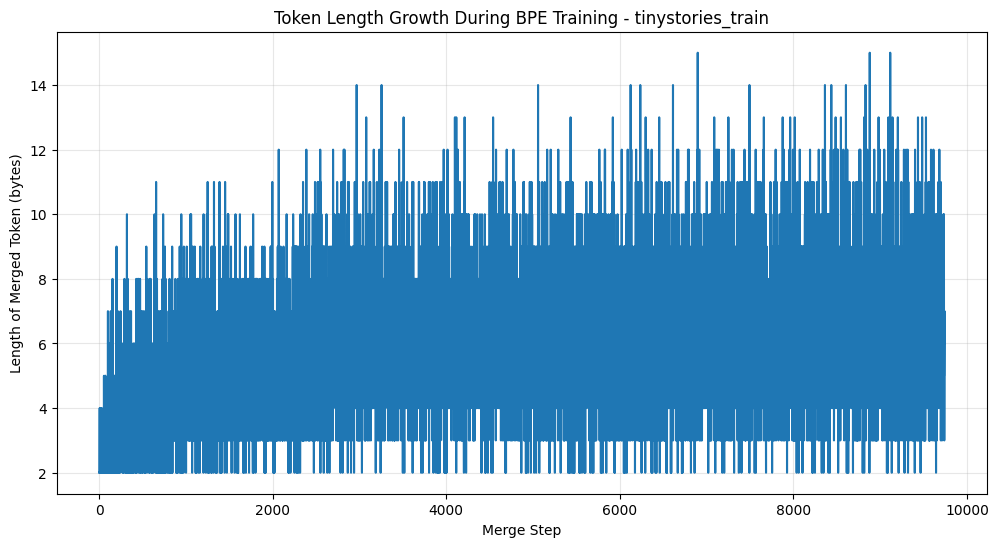

Merge result length statistics:
  Min length: 2
  Max length: 15
  Mean length: 5.92
  Median length: 6.00


In [20]:
if 'merges' in locals():
    # Analyze the length of merged tokens
    merge_result_lengths = []
    for token1, token2 in merges:
        merged_length = len(token1) + len(token2)
        merge_result_lengths.append(merged_length)
    
    # Plot merge result lengths over time
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(merge_result_lengths) + 1), merge_result_lengths)
    plt.xlabel('Merge Step')
    plt.ylabel('Length of Merged Token (bytes)')
    plt.title(f'Token Length Growth During BPE Training - {model_name}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Merge result length statistics:")
    print(f"  Min length: {min(merge_result_lengths)}")
    print(f"  Max length: {max(merge_result_lengths)}")
    print(f"  Mean length: {np.mean(merge_result_lengths):.2f}")
    print(f"  Median length: {np.median(merge_result_lengths):.2f}")
else:
    print("No merges loaded.")

## Compare Multiple Models

If you have multiple trained models, compare their characteristics:

In [21]:
# Compare all available models
if available_models:
    comparison_data = {}
    
    for model in available_models:
        try:
            vocab, merges = load_bpe_results(model)
            
            # Calculate statistics
            token_lengths = [len(token_bytes) for token_bytes in vocab.values()]
            longest_token_length = max(token_lengths)
            avg_token_length = np.mean(token_lengths)
            
            comparison_data[model] = {
                'vocab_size': len(vocab),
                'num_merges': len(merges),
                'longest_token': longest_token_length,
                'avg_token_length': avg_token_length
            }
        except Exception as e:
            print(f"Error loading model {model}: {e}")
    
    # Display comparison table
    if comparison_data:
        print("Model Comparison:")
        print(f"{'Model':<20} {'Vocab Size':<12} {'Merges':<8} {'Longest Token':<14} {'Avg Length':<12}")
        print("-" * 70)
        for model, data in comparison_data.items():
            print(f"{model:<20} {data['vocab_size']:<12} {data['num_merges']:<8} {data['longest_token']:<14} {data['avg_token_length']:<12.2f}")
else:
    print("No models available for comparison.")

Model Comparison:
Model                Vocab Size   Merges   Longest Token  Avg Length  
----------------------------------------------------------------------
tinystories_sample   1000         743      13             3.14        
tinystories_test     10000        9743     15             5.77        
tinystories_train    10000        9743     15             5.79        


## Utility Functions

Helper functions for further analysis:

In [22]:
def find_tokens_containing_substring(vocab, substring: str):
    """
    Find all tokens that contain a specific substring when decoded.
    """
    matching_tokens = []
    substring_bytes = substring.encode('utf-8')
    
    for token_id, token_bytes in vocab.items():
        if substring_bytes in token_bytes:
            try:
                decoded = token_bytes.decode('utf-8', errors='replace')
                matching_tokens.append((token_id, token_bytes, decoded))
            except:
                pass
    
    return matching_tokens

def analyze_token_by_id(vocab, token_id: int):
    """
    Analyze a specific token by its ID.
    """
    if token_id in vocab:
        token_bytes = vocab[token_id]
        print(f"Token ID: {token_id}")
        print(f"Bytes: {token_bytes}")
        print(f"Length: {len(token_bytes)}")
        try:
            decoded = token_bytes.decode('utf-8', errors='replace')
            print(f"Decoded: '{decoded}'")
        except:
            print("Cannot decode as UTF-8")
    else:
        print(f"Token ID {token_id} not found in vocabulary")

# Example usage:
if 'vocab' in locals():
    print("Example: Finding tokens containing 'the'")
    the_tokens = find_tokens_containing_substring(vocab, 'the')
    print(f"Found {len(the_tokens)} tokens containing 'the'")
    for token_id, token_bytes, decoded in the_tokens[:5]:
        print(f"  ID {token_id}: '{decoded}'")

Example: Finding tokens containing 'the'
Found 61 tokens containing 'the'
  ID 263: ' the'
  ID 362: ' they'
  ID 401: ' there'
  ID 453: 'gether'
  ID 457: ' together'
